In [275]:
#Import libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [276]:
#Import the Dataset of Amazon Kindle Books 2023
Books_D=pd.read_csv('kindle_data-v2.csv')

In [277]:
#See what type of columns do we have
Books_D.columns

Index(['asin', 'title', 'author', 'soldBy', 'imgUrl', 'productURL', 'stars',
       'reviews', 'price', 'isKindleUnlimited', 'category_id', 'isBestSeller',
       'isEditorsPick', 'isGoodReadsChoice', 'publishedDate', 'category_name'],
      dtype='object')

In [278]:
#Check how many distincs categories and books are
Number_Books=Books_D['title'].nunique()
Number_Categories=Books_D['category_id'].nunique()
print("TOTAL BOOKS","\nNumber of categories:",Number_Categories,"\nNumber of books:",Number_Books)

TOTAL BOOKS 
Number of categories: 31 
Number of books: 131913


In [279]:
#Function to generate the barchart horizontally for categorical data
def barchart_books(values,labels,title):
    #Initialise the figure and ax objetcs to have more tools to edit
    fig, ax =plt.subplots(figsize=(10,8))
    #Create the barchart for the categorical data horizontal
    ax.barh(labels,values, color='red',align='center')
    ax.invert_yaxis()
    ax.set_ylabel("Books Categories")
    ax.set_xlabel("Number of Books")
    ax.set_title(title)
    ax.grid()
    plt.show()
    return

In [280]:
#Filter just the columns i will use
Base=Books_D.groupby(['title','category_name']).agg({'stars':'mean','reviews':'sum','price':'mean'})

In [297]:
#I created a new table with the number of distinct books by category
Number_Books=Base.reset_index().groupby('category_name')['title'].nunique().sort_values(ascending=False)

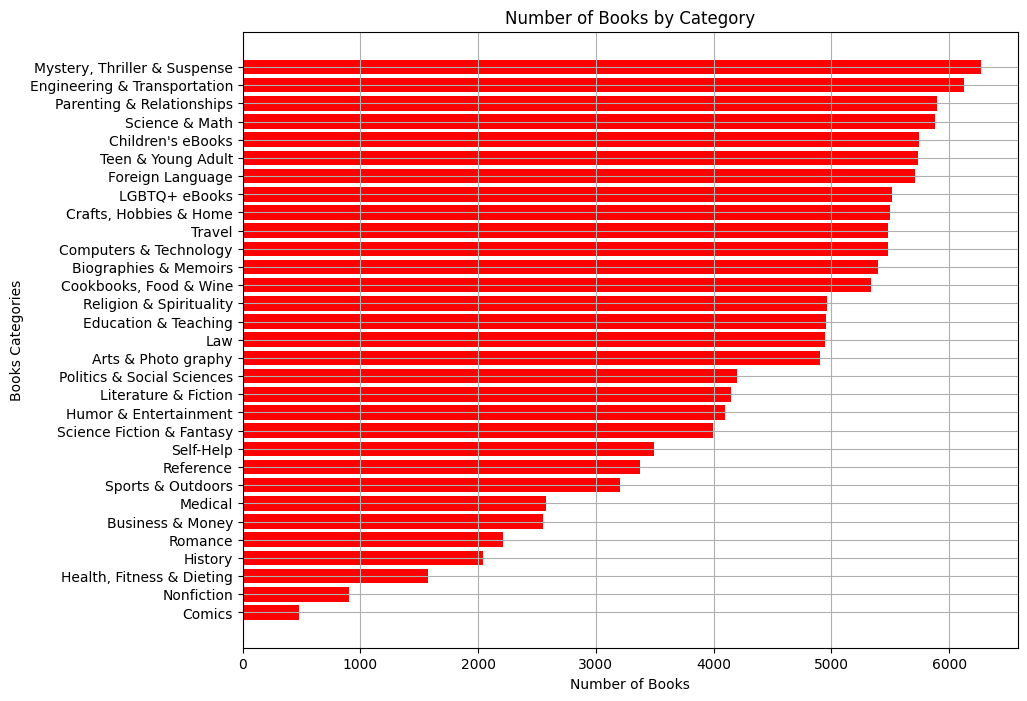

In [298]:
#Generate the chart of all the books for kindle
title='Number of Books by Category'
barchart_books(Number_Books.values,Number_Books.index,title)

In [299]:
#Check how many distincs categories and books are in Amazon Unlimited
Number_Books_A=Books_D[Books_D['isKindleUnlimited']==True]['title'].nunique()
Number_Categories_A=Books_D[Books_D['isKindleUnlimited']==True]['category_id'].nunique()
print("TOTAL BOOKS AMAZON","\nNumber of categories:",Number_Categories_A,"\nNumber of books:",Number_Books_A)

TOTAL BOOKS AMAZON 
Number of categories: 31 
Number of books: 35752


In [300]:
Base_A=Books_D[Books_D['isKindleUnlimited']==True].groupby(['title','category_name']).agg({'stars':'mean','reviews':'sum','price':'mean'})

In [303]:
Number_Books_A=Base_A.reset_index().groupby('category_name')['title'].nunique().sort_values(ascending=False)

In [317]:
Number_Books_A

category_name
LGBTQ+ eBooks                   3906
Mystery, Thriller & Suspense    3077
Teen & Young Adult              2482
Science Fiction & Fantasy       2372
Literature & Fiction            2353
Humor & Entertainment           1891
Religion & Spirituality         1688
Romance                         1647
Cookbooks, Food & Wine          1578
Crafts, Hobbies & Home          1500
Parenting & Relationships       1493
Travel                          1367
Foreign Language                1220
Children's eBooks               1166
Computers & Technology           882
Engineering & Transportation     841
Education & Teaching             752
Sports & Outdoors                715
Biographies & Memoirs            690
Arts & Photo graphy              591
Self-Help                        545
Law                              491
Reference                        482
History                          424
Science & Math                   386
Politics & Social Sciences       270
Health, Fitness & Dietin

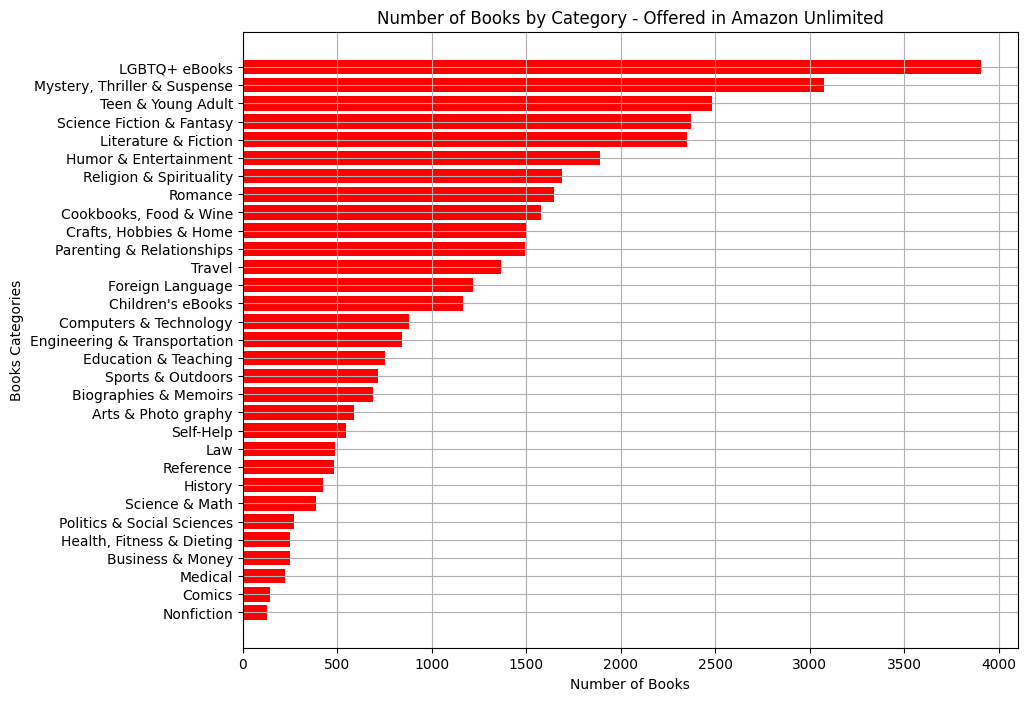

In [305]:
#Generate the chart for just the books included in amazon unlimited
title='Number of Books by Category - Offered in Amazon Unlimited'
barchart_books(Number_Books_A.values,Number_Books_A.index,title)

In [306]:
#We are going to check the numerical variables and their basic statistics for kindle books
Base.describe()

,stars,reviews,price
count,132663.000000,132663.000000,132663.000000
mean,4.405205,890.312227,15.012842
std,0.740412,5115.970487,21.934519
min,0.000000,0.000000,0.000000
25%,4.400000,0.000000,4.990000
50%,4.500000,4.000000,9.990000
75%,4.700000,367.000000,14.950000
max,5.000000,618227.000000,682.000000


In [307]:
#We are going to check the numerical variables and their basic statistics for amazon unlimited books
Base_A.describe()

,stars,reviews,price
count,35810.000000,35810.000000,35810.000000
mean,4.397515,1048.150014,5.954658
std,0.641146,4547.232483,3.952733
min,0.000000,0.000000,0.000000
25%,4.300000,0.000000,3.990000
50%,4.500000,41.000000,4.990000
75%,4.600000,711.750000,6.990000
max,5.000000,242575.000000,150.000000


In [308]:
def scatter_reviews_stars(reviews,price,title):
    #Initialise the figure and ax objetcs to have more tools to edit
    fig,ax=plt.subplots(figsize=(10,8))
    #Create the scatterplot
    ax.scatter(reviews,price,color='red')
    #Set a log scale to the reviews because the number changes much
    ax.set_xscale('log')
    ax.grid()
    ax.set_ylabel('Stars')
    ax.set_xlabel('Reviews')
    ax.set_title(title)
    plt.show()
    return

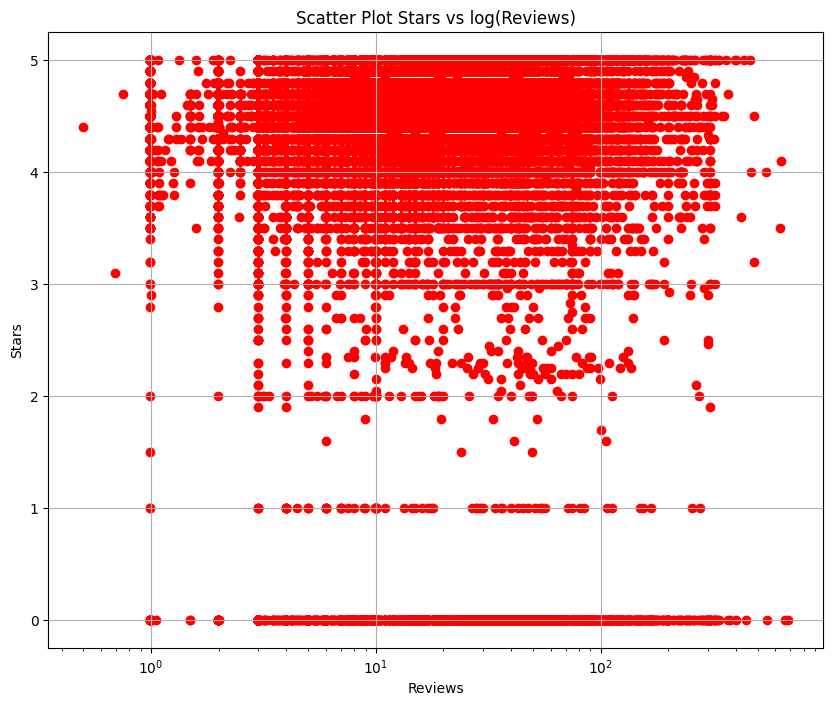

In [318]:
title='Scatter Plot Stars vs log(Reviews)'
scatter_reviews_stars(Base['reviews'].values,Base['stars'].values,title)

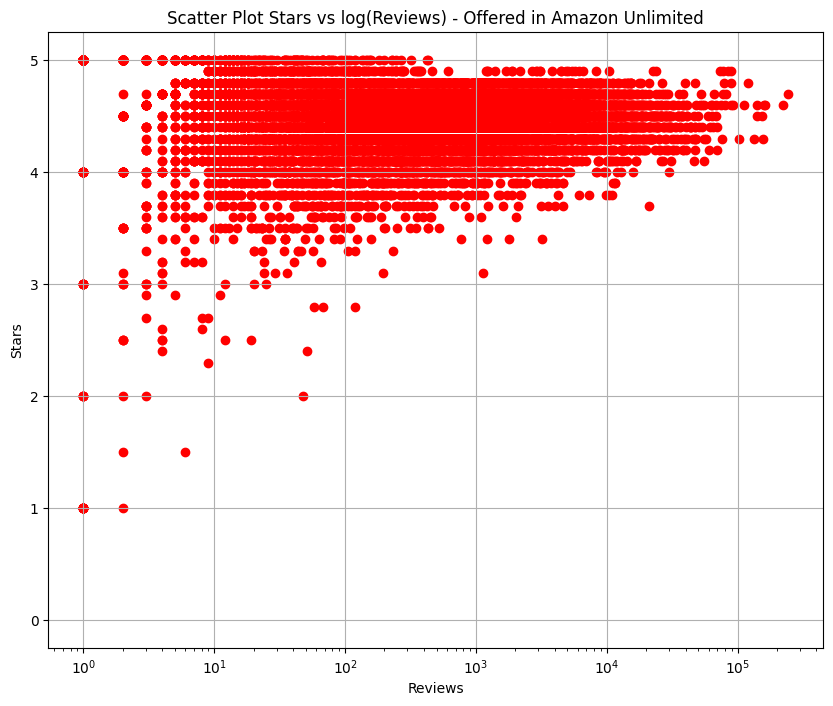

In [321]:
title='Scatter Plot Stars vs log(Reviews) - Offered in Amazon Unlimited'
scatter_reviews_stars(Base_A['reviews'].values,Base_A['stars'].values,title)

In [320]:
def correlation_plot(base,method):
    #Initialise the figure and ax objetcs to have more tools to edit
    fig,ax=plt.subplots(dpi=144)
    #Create the corner heat map
    mask = np.triu(np.ones_like(base.corr()))
    sns.heatmap(base.corr(method=method), ax=ax, vmin=-1, vmax=1, cmap='RdBu', annot=True, mask=mask)
    plt.title('Correlation '+method)
    plt.show()
    return

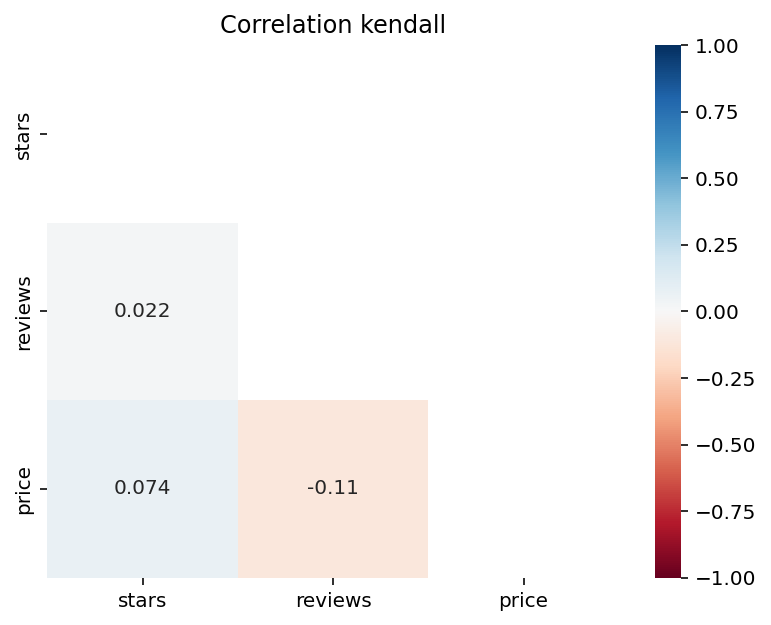

In [312]:
correlation_plot(Base,'kendall')

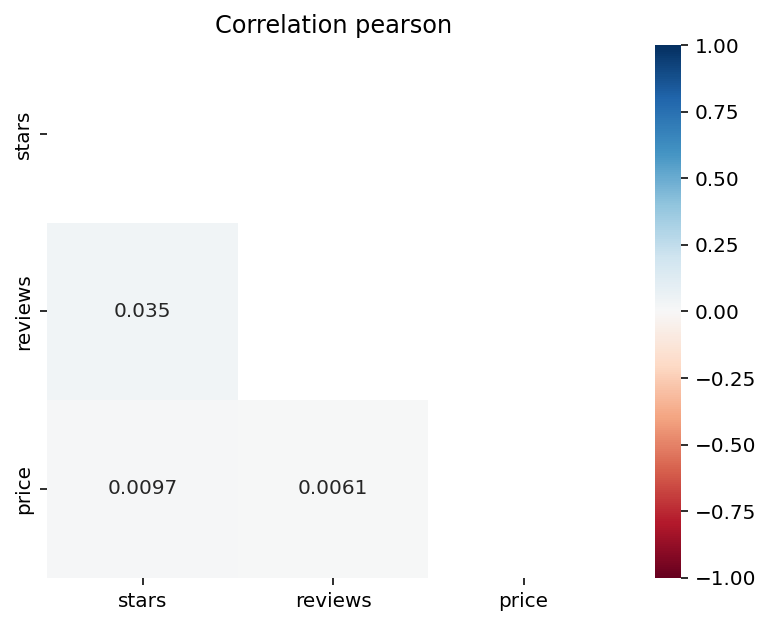

In [313]:
correlation_plot(Base_A,'pearson')

In [314]:
def plot_box(Base,Base1):
    #Initialise the figure and ax objetcs to have more tools to edit
    plt.figure(dpi=144)
    #Create the boxplot of stars
    plt.boxplot([Base,Base1],labels=['Total','Amazon Unlimited'])
    plt.ylabel('Stars')
    plt.title('Boxplot Stars - Total vs Amazon Unlimited')
    plt.grid()
    plt.show()
    return

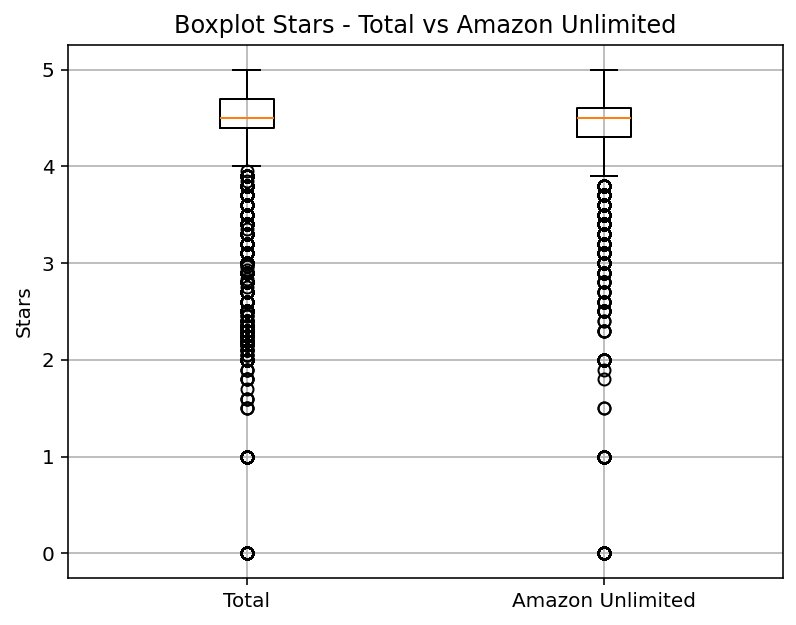

In [315]:
plot_box(Base['stars'].values,Base_A['stars'].values)